In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

In [41]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


DATA PREPROCESSING

In [42]:
df.shape

(150, 6)

In [43]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So, No null values


DATA VISUALIZATION

<ipython-input-45-a5c141e1443c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

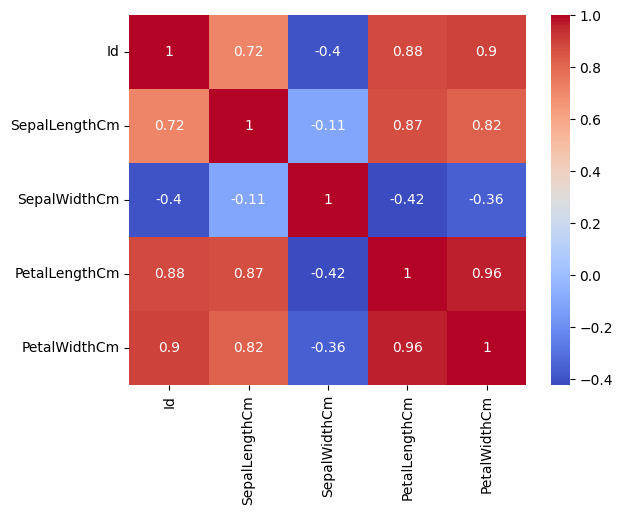

In [45]:
#Heat Map
correlation=df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

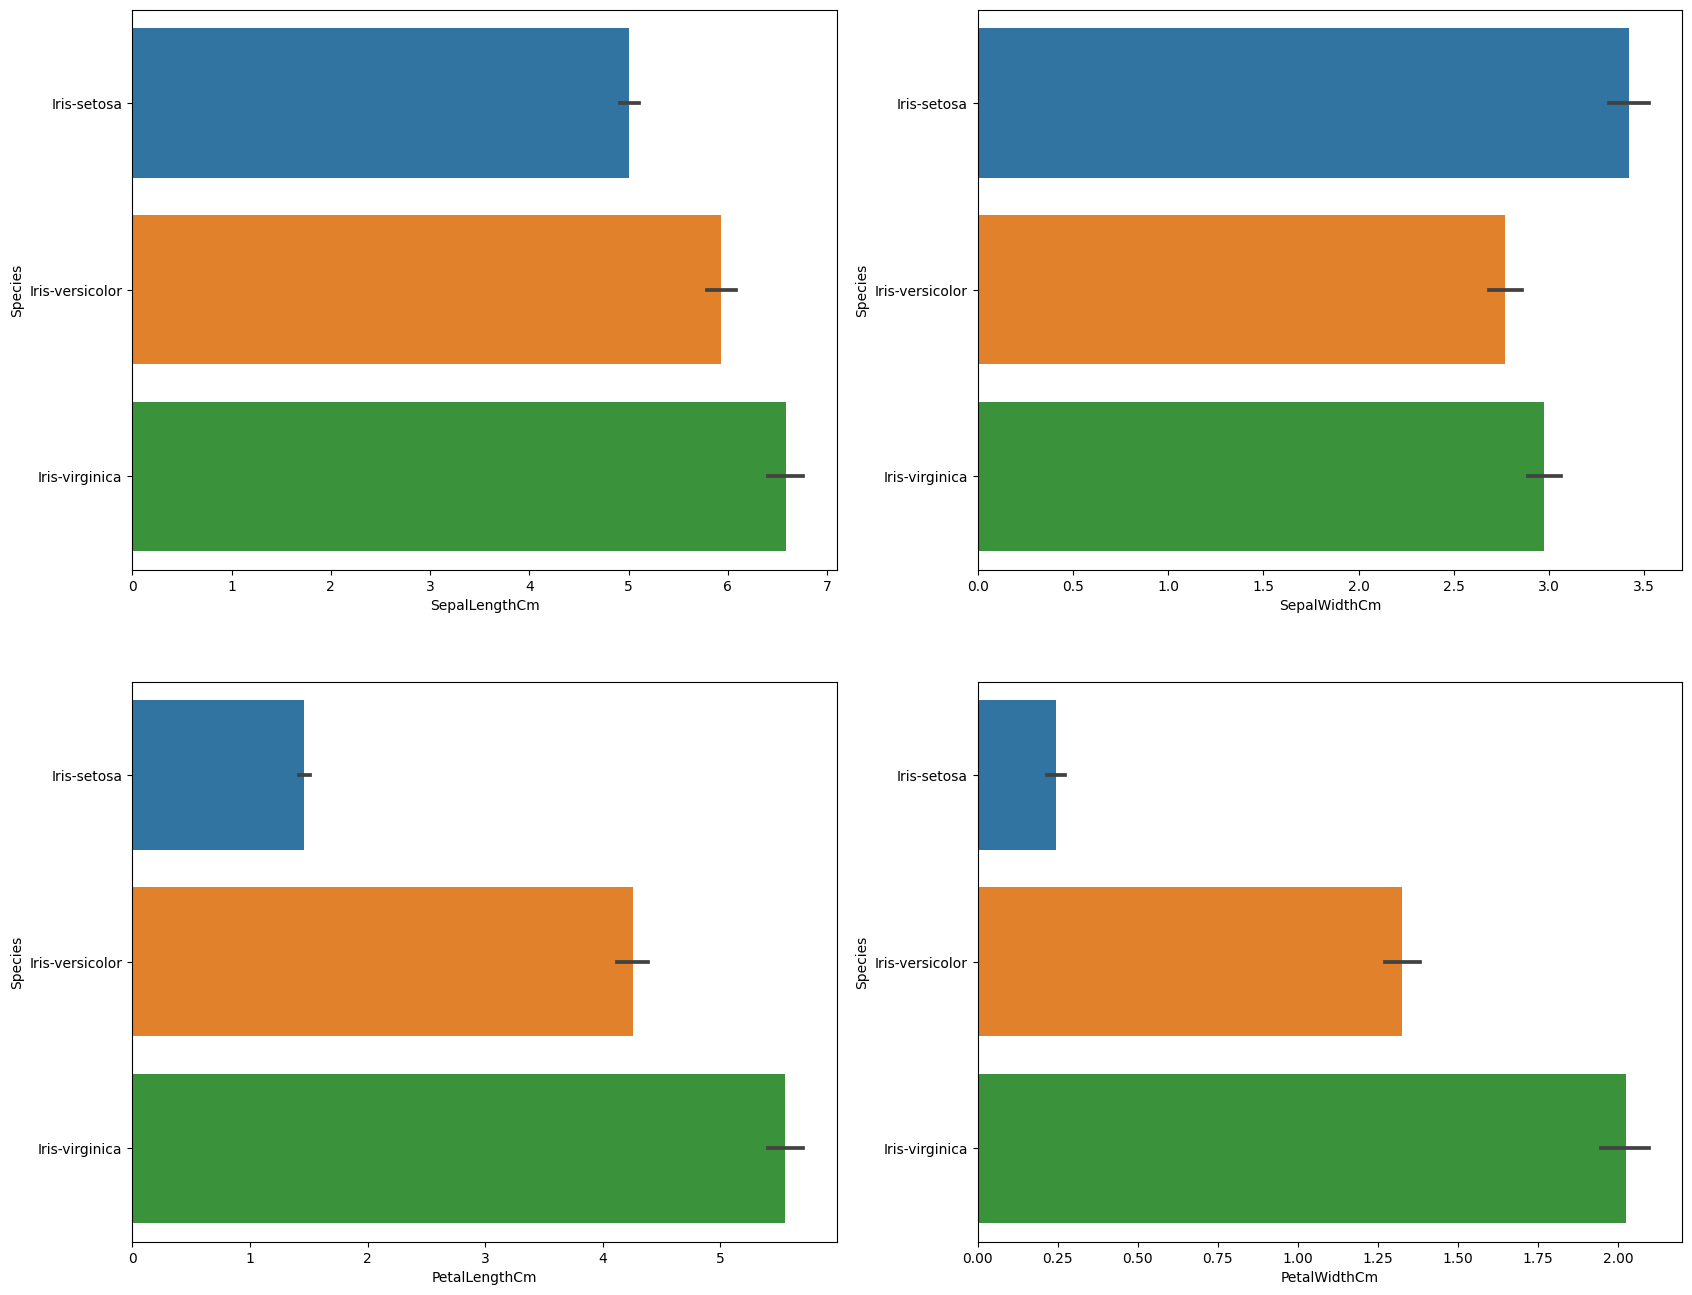

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
plt.subplot(221)
sns.barplot(data=df, x = 'SepalLengthCm', y = 'Species')
plt.subplot(222)
sns.barplot(data=df, x = 'SepalWidthCm', y = 'Species')

plt.subplot(223)
sns.barplot(data=df, x = 'PetalLengthCm', y = 'Species')

plt.subplot(224)
sns.barplot(data=df, x = 'PetalWidthCm', y = 'Species')

In [47]:
#ENCODING
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species_index']= label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_index
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [48]:
#train test spilt
from sklearn.model_selection import train_test_split
X = df[df.columns].drop('Species', axis=1)
y = df['Species']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

APPLYING MODELS

In [50]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)
dtree_y_pred = d_tree.predict(X_test)

dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
print("Accuracy:",dtree_accuracy)

Accuracy: 1.0


In [51]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )
knn_classifier.fit(X_train, y_train)
knn_y_pred= knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 1.0


In [52]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 1.0


In [53]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(random_state=42)
r_forest.fit(X_train, y_train)
r_y_pred = r_forest.predict(X_test)

# Calculate the accuracy
r_accuracy = accuracy_score(y_test,r_y_pred)
print("Accuracy:", r_accuracy)

Accuracy: 1.0
